<a href="https://colab.research.google.com/github/Omprakash2057/GenAIB-39/blob/main/ASSIGNMENT_8_1_GI_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2303A52057

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5253 - loss: 0.6908 - val_accuracy: 0.5281 - val_loss: 0.6895
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4945 - loss: 0.6967 - val_accuracy: 0.5281 - val_loss: 0.6894
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5062 - loss: 0.6940 - val_accuracy: 0.5281 - val_loss: 0.6894
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5227 - loss: 0.6938 - val_accuracy: 0.5281 - val_loss: 0.6894
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5173 - loss: 0.6938 - val_accuracy: 0.5281 - val_loss: 0.6894
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5228 - loss: 0.6924 - val_accuracy: 0.5281 - val_loss: 0.6893
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5157 - loss: 0.6934 - val_accuracy: 0.5281 - val_loss: 0.6893
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5418 - loss: 0.6908 - val_accuracy: 0.53

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training Accuracy: 0.5371
Testing Accuracy: 0.5531
Confusion Matrix:


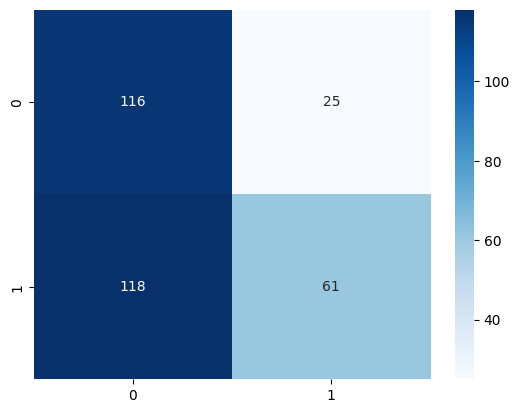

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.82      0.62       141
           1       0.71      0.34      0.46       179

    accuracy                           0.55       320
   macro avg       0.60      0.58      0.54       320
weighted avg       0.62      0.55      0.53       320

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Quality: Good Quality


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("winequality-red.csv")

# Prepare data
X = data.drop(columns=["quality"])
y = data["quality"].apply(lambda q: 1 if q >= 6 else 0)  # Convert to binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN model
def build_ann():
    model = Sequential([
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(20, activation='relu'),
        Dense(25, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
    return model

# Train model
model = build_ann()
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=1)

# Save model
model.save("wine_quality_model.h5")

# Evaluate model
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Load and deploy model
loaded_model = load_model("wine_quality_model.h5")
def predict_quality(features):
    features = scaler.transform([features])
    prediction = loaded_model.predict(features)
    return "Good Quality" if prediction > 0.5 else "Bad Quality"

# Example prediction
sample_features = X_test[0]
print("Predicted Quality:", predict_quality(sample_features))